In [0]:
from skimage import color
from skimage import io
import skimage as sm
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import scipy
from scipy import ndimage
import scipy.misc as scm

#Check

In [0]:
check = cv2.imread('check.jpg', cv2.IMREAD_GRAYSCALE)

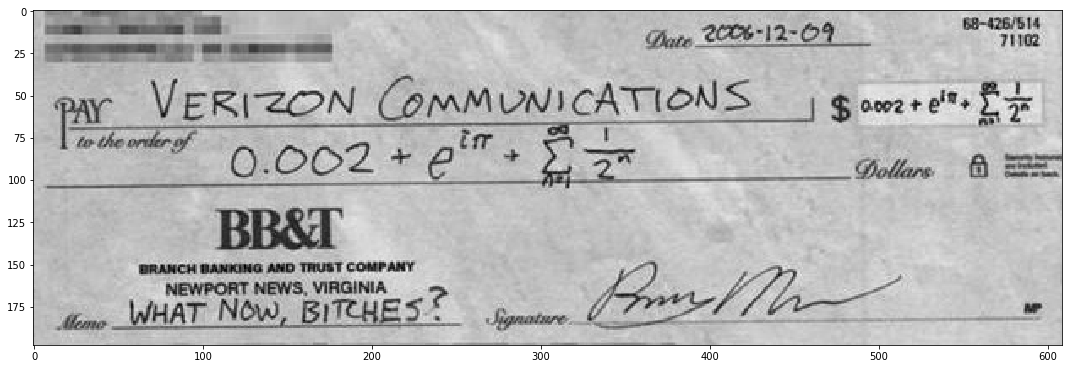

In [0]:
plt.figure(figsize=[15,6])
io.imshow(check)

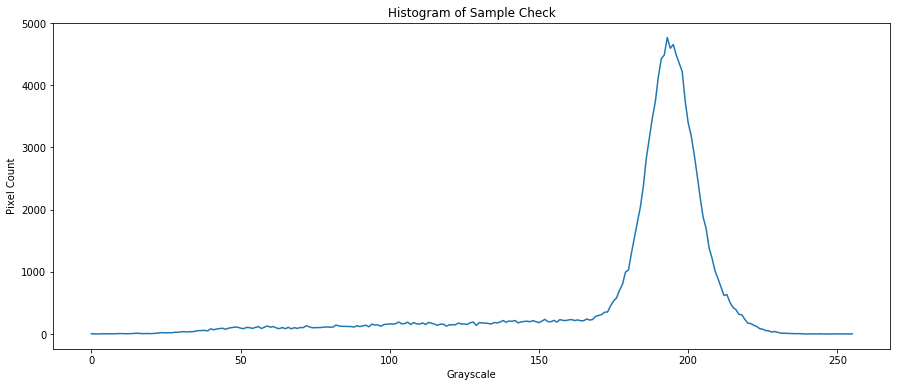

In [0]:
hist = cv2.calcHist([check],[0],None,[256],[0,256])
plt.figure(figsize=[15,6])
plt.plot(hist)
plt.title('Histogram of Sample Check')
plt.xlabel('Grayscale')
plt.ylabel('Pixel Count')
plt.show()

(-0.5, 608.5, 197.5, -0.5)

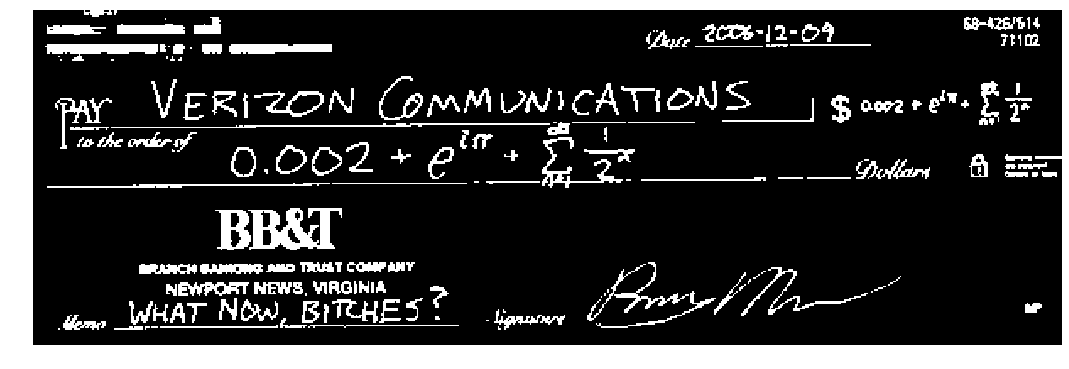

In [0]:
BG = check < 125 #to select the black parts and convert it into white
plt.figure(figsize=[15,6])
io.imshow(BG)
plt.axis('off')

(-0.5, 608.5, 197.5, -0.5)

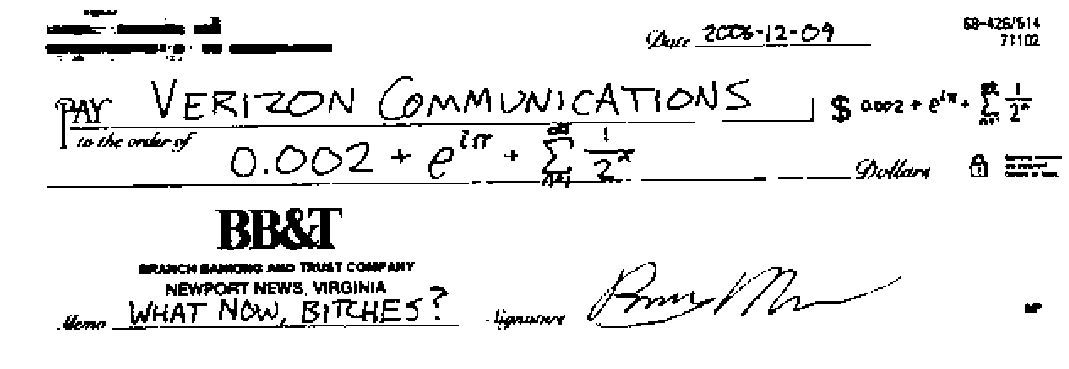

In [0]:
BG = check > 125 #to select the white parts (background) and convert it into white
plt.figure(figsize=[15,6])
io.imshow(BG)
plt.axis('off')

#3D Image

##Parametric

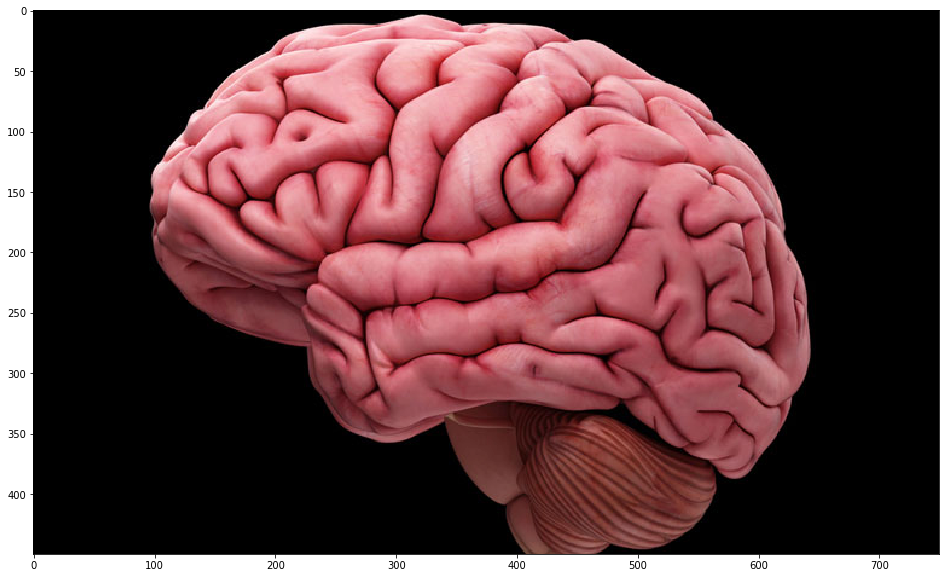

In [0]:
#img = io.imread('Gretag-Macbeth_ColorChecker.jpg')
img = io.imread('brain.jpg')
image = sm.img_as_float(img)
image = np.double(image)
plt.figure(figsize = [20,10])
plt.imshow(image)
#plt.axis('off')

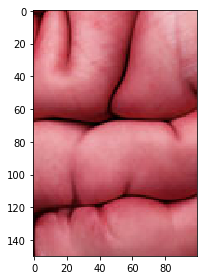

In [0]:
#cropped = image[195:205,320:330]
#cropped = image[175:225,300:350]
#cropped = image[150:250,325:375]
cropped = image[125:275,275:375]

io.imshow(cropped)

In [0]:
cropped_imgR = cropped[:,:,0]
cropped_imgG = cropped[:,:,1]
cropped_imgB = cropped[:,:,2]

image_R = image[:,:,0]
image_G = image[:,:,1]
image_B = image[:,:,2]

I_patch = cropped_imgR + cropped_imgG + cropped_imgB
I_obj = image_R + image_G + image_B

I_patch[I_patch==0] = 100000
I_obj[I_obj==0] = 100000

In [0]:
r_patch = cropped_imgR/I_patch 
g_patch = cropped_imgG/I_patch

r_obj = image_R/I_obj 
g_obj = image_G/I_obj

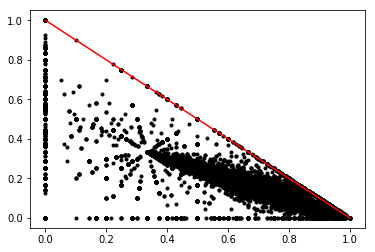

In [0]:
plt.plot(r_obj,g_obj,'k.')
plt.plot(np.linspace(0,1), np.linspace(1,0), 'r')
plt.show()

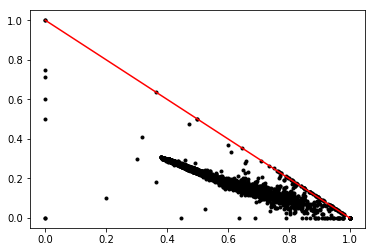

In [0]:
plt.plot(r_patch,g_patch,'k.')
plt.plot(np.linspace(0,1), np.linspace(1,0), 'r')
plt.show()

In [0]:
mean_r = np.mean(r_patch)
mean_g = np.mean(g_patch)
stdev_r = np.std(r_patch)
stdev_g = np.std(g_patch)

def probability(obj,patch):
  mean = np.mean(patch)
  stdev = np.std(patch)
  p = (1/(stdev*np.sqrt(2*np.pi))*np.exp(-((obj-mean)**2)/(2*(stdev**2))))
  return p

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


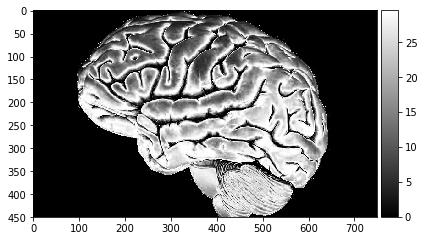

In [0]:
joint_prob = probability(r_obj,r_patch)*probability(g_obj,g_patch)
io.imshow(joint_prob,cmap = 'gray')

##Non-Parametric

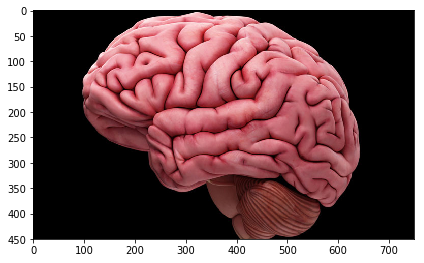

In [0]:
io.imshow(image)

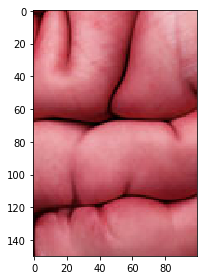

In [0]:
io.imshow(cropped)

In [0]:
def RGB_extract(IMG):
  R = IMG[:,:,0]
  G = IMG[:,:,1]
  B = IMG[:,:,2]
  return R,G,B

In [0]:
R_cr, G_cr, B_cr = RGB_extract(cropped)

In [0]:
cr_intensity = R_cr + G_cr + B_cr

In [0]:
cr_intensity[cr_intensity == 0] = 10000000

In [0]:
R_cr_norm =R_cr/cr_intensity
G_cr_norm =G_cr/cr_intensity

In [0]:
bins = 128

In [0]:
R_cn_int = np.floor((R_cr_norm*(bins-1)+1))
G_cn_int = np.floor((G_cr_norm*(bins-1)+1))

In [0]:
colors = G_cn_int + (R_cn_int-1)*bins

In [0]:
hist = np.zeros((bins,bins))

In [0]:
R_cn_int = np.floor((R_cr_norm*(bins-1)+1))
G_cn_int = np.floor((G_cr_norm*(bins-1)+1))
colors = G_cn_int + (R_cn_int-1)*bins
hist = np.zeros((bins,bins))
for i in range(bins):
  for j in range(bins-i+1):
    val = j+(i-1)*bins
    ch = colors[colors == val]
    if i < bins and j < bins:
      hist[i,j] = len(ch)
    else:
      hist[bins-1,bins-1] = len(ch)

#Mine

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


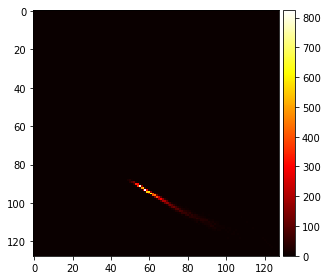

In [0]:
io.imshow(np.rot90(hist), cmap = 'hot')
plt.show()

In [0]:
row, column = np.shape(image_R)
S = np.zeros([row,column])
hist = np.rot90(hist)

In [0]:
rcheck = []
gcheck = []
for i in range(row):
  for j in range(column):
    rval = image_R[i,j]
    gval = image_G[i,j]
    rcheck.append(rval)
    gcheck.append(gval)
    rx = rval*(bins-1)+1
    gx = rval*(bins-1)+1
    if rx == bins:
      rx -= 1
    if gx == bins:
      gx -= 1
    val = hist[int(rx)][int(gx)]
    S[i,j] = val


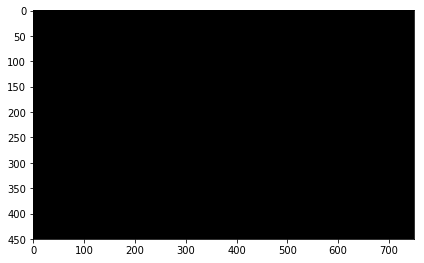

In [0]:
io.imshow(S,cmap = 'gray')

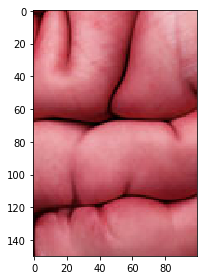

In [0]:
io.imshow(cropped)